<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/GNSS_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

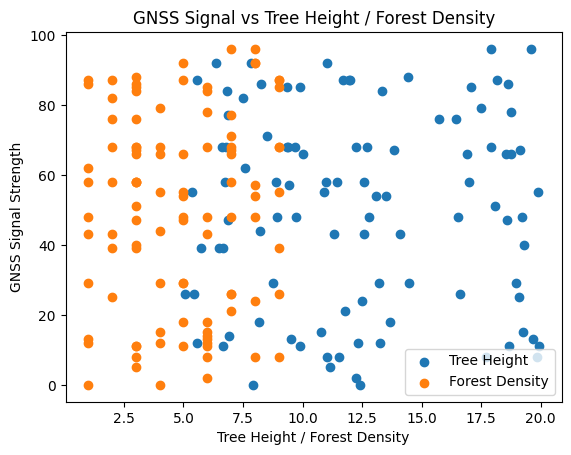

Correlation with Tree Height: -0.0019040815682980718
Correlation with Forest Density: 0.05909921334028213


In [ ]:
# Generate demo GNSS data
num_points = 100
gnss_data = {
    'time': np.arange(num_points),
    'signal_strength': np.random.randint(0, 100, num_points)
}

gnss_df = pd.DataFrame(gnss_data)

# Generate demo tree data
tree_data = {
    'time': np.random.choice(np.arange(num_points), size=num_points, replace=True),
    'tree_height': np.random.uniform(5, 20, num_points),
    'num_trees_per_sqm': np.random.randint(1, 10, num_points)
}

tree_df = pd.DataFrame(tree_data)

# Merge with tree data based on a common parameter (e.g., time)
merged_data = pd.merge(gnss_df, tree_df, on='time', how='inner')

# Perform correlation analysis
correlation_height = np.corrcoef(merged_data['signal_strength'], merged_data['tree_height'])[0, 1]
correlation_density = np.corrcoef(merged_data['signal_strength'], merged_data['num_trees_per_sqm'])[0, 1]

# Plot the results
plt.scatter(merged_data['tree_height'], merged_data['signal_strength'], label='Tree Height')
plt.scatter(merged_data['num_trees_per_sqm'], merged_data['signal_strength'], label='Forest Density')
plt.xlabel('Tree Height / Forest Density')
plt.ylabel('GNSS Signal Strength')
plt.legend()
plt.title('GNSS Signal vs Tree Height / Forest Density')
plt.show()

# Print correlation coefficients
print(f"Correlation with Tree Height: {correlation_height}")
print(f"Correlation with Forest Density: {correlation_density}")


In [ ]:
pip install numpy pandas matplotlib seaborn


In [ ]:
pip install georinex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00


In [ ]:
import georinex as gr

In [ ]:
obs = gr.load('/content/reachqbase_raw_20231214093229.23O')

FileNotFoundError: /content/reachqbase_raw_20231214093229.23O

In [ ]:
obs.to_netcdf('process.nc', group='OBS')

NameError: name 'obs' is not defined

In [ ]:
pip install xarray pymap3d


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
hdr = gr.rinexheader('/content/reachqbase_raw_20231214093229.23O')

In [ ]:
print(hdr)

{'version': 3.03, 'filetype': 'O', 'rinextype': 'obs', 'systems': 'M', 'PGM / RUN BY / DATE': 'ES 1.7                                  20240130 115155 UTC ', 'COMMENT': 'log: C:\\Users\\Hem Raj\\Desktop\\Research\\RMU\\data\\reachqbase_r input_format: RINEX                                         ', 'MARKER NAME': 'Cp1                                                         ', 'MARKER NUMBER': '                                                            ', 'MARKER TYPE': '                                                            ', 'OBSERVER / AGENCY': '                                                            ', 'REC # / TYPE / VERS': '                    EMLID REACH RS+                         ', 'ANT # / TYPE': '                                                            ', 'APPROX POSITION XYZ': '   590181.6831  5591360.2533  3003784.6792                  ', 'ANTENNA: DELTA H/E/N': '        1.6650        0.0000        0.0000                  ', 'TIME OF FIRST OBS': '  2023    1

In [ ]:
import georinex as gr
import matplotlib.pyplot as plt

# Specify the path to your RINEX file
rinex_file_path = '/content/reachqbase_raw_20240424060345.24O'

# Load RINEX data
obs_data = gr.load(rinex_file_path, use='G', verbose=True)
print(obs_data)
# Extract relevant information
satellite_prns = obs_data.satellites
snr_data = obs_data['G'].SNR

# Plot SNR values
for prn in satellite_prns:
    plt.plot(obs_data['time'], snr_data.sel(sv=prn), label=f'GPS PRN {prn}')

plt.xlabel('Time')
plt.ylabel('SNR (dBHz)')
plt.legend()
plt.title('SNR vs Time for GPS Satellites')
plt.show()


<xarray.Dataset>
Dimensions:  (sv: 14, time: 54037)
Coordinates:
  * sv       (sv) <U3 'G05' 'G06' 'G11' 'G12' 'G13' ... 'G22' 'G24' 'G25' 'G29'
  * time     (time) datetime64[ns] 2024-04-24T06:04:03.587000 ... 2024-04-24T...
Data variables:
    C1C      (time, sv) float64 nan 1.609e+07 1.742e+07 ... 1.773e+07 2.022e+07
    L1C      (time, sv) float64 nan 8.456e+07 9.155e+07 ... 9.317e+07 1.062e+08
    D1C      (time, sv) float64 nan -681.7 1.861e+03 ... nan 189.3 2.65e+03
    S1C      (time, sv) float64 nan 48.0 44.0 39.0 nan ... nan nan 33.0 41.0
Attributes:
    version:          3.03
    interval:         0.2
    rinextype:        obs
    fast_processing:  0
    time_system:      GPS
    filename:         reachqbase_raw_20240424060345.24O
    position:         [590247.7151, 5591417.5153, 3003741.2005]


AttributeError: 'Dataset' object has no attribute 'satellites'

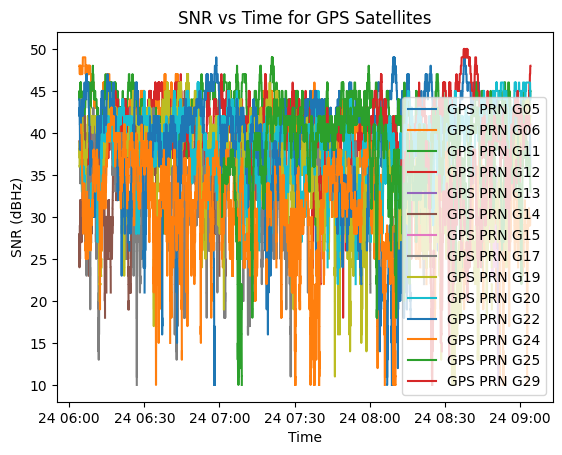

In [ ]:
import matplotlib.pyplot as plt

# Extract relevant information
satellite_prns = obs_data['sv'].values
snr_data = obs_data['S1C']

# Plot SNR values
for prn in satellite_prns:
    plt.plot(obs_data['time'], snr_data.sel(sv=prn), label=f'GPS PRN {prn}')

plt.xlabel('Time')
plt.ylabel('SNR (dBHz)')
plt.legend()
plt.title('SNR vs Time for GPS Satellites')
plt.show()


In [ ]:
pip install georinex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 861.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.7 MB/s eta 0:00:00


In [ ]:
import georinex as gr

In [ ]:
from pyproj import Proj, transform

# Given XYZ coordinates from the RINEX header
xyz_coordinates = (590181.6831, 5591360.2533, 3003784.6792)

# Define the projection systems
input_projection = Proj(init='epsg:4326')  # WGS84
output_projection = Proj(init='epsg:3857')  # Web Mercator (XYZ is similar to Web Mercator)

# Convert XYZ to geographical coordinates (latitude, longitude, altitude)
longitude, latitude, altitude = transform(output_projection, input_projection, *xyz_coordinates)

# Print the result
print(f'Latitude: {latitude} degrees')
print(f'Longitude: {longitude} degrees')
print(f'Altitude: {altitude} meters')


Latitude: 44.808094081421665 degrees
Longitude: 5.301692263361138 degrees
Altitude: 3003784.6792 meters


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-11-6cbdc8356def>:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude, altitude = transform(output_p

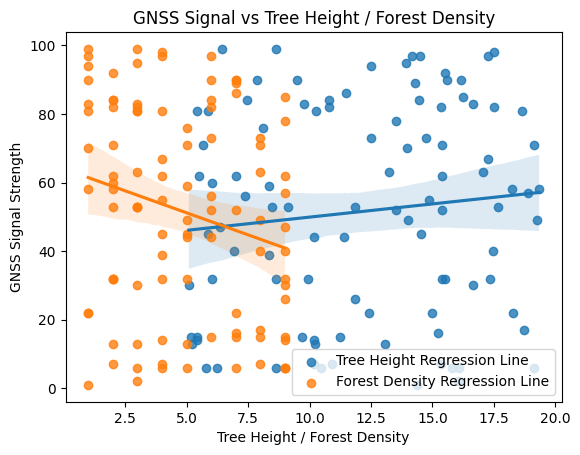

Correlation with Tree Height: 0.10946475501275776
Correlation with Forest Density: -0.2255707602468978
Covariance with Tree Height: 14.404356448153635
R-squared: 0.011982532590003073
Slope of the Regression Line: 0.7706413551928152
Intercept of the Regression Line: 42.23482830715466
P-value: 0.27829968401600674
Confidence Intervals for Slope: (-0.6148484880697632, 2.1561311984553937)
Confidence Intervals for Intercept: (40.84933846389208, 43.62031815041723)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# Generate demo GNSS data
num_points = 100
gnss_data = {
    'time': np.arange(num_points),
    'signal_strength': np.random.randint(0, 100, num_points)
}

gnss_df = pd.DataFrame(gnss_data)

# Generate demo tree data
tree_data = {
    'time': np.random.choice(np.arange(num_points), size=num_points, replace=True),
    'tree_height': np.random.uniform(5, 20, num_points),
    'num_trees_per_sqm': np.random.randint(1, 10, num_points)
}

tree_df = pd.DataFrame(tree_data)

# Merge with tree data based on a common parameter (e.g., time)
merged_data = pd.merge(gnss_df, tree_df, on='time', how='inner')

# Perform correlation analysis
correlation_height = np.corrcoef(merged_data['signal_strength'], merged_data['tree_height'])[0, 1]
correlation_density = np.corrcoef(merged_data['signal_strength'], merged_data['num_trees_per_sqm'])[0, 1]

# Covariance
covariance_height = np.cov(merged_data['signal_strength'], merged_data['tree_height'])[0, 1]

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['tree_height'], merged_data['signal_strength'])
r_squared = r_value**2

# Confidence Intervals
conf_int_slope = (slope - 1.96 * std_err, slope + 1.96 * std_err)
conf_int_intercept = (intercept - 1.96 * std_err, intercept + 1.96 * std_err)

# Plot the results with regression lines
sns.regplot(x='tree_height', y='signal_strength', data=merged_data, label='Tree Height Regression Line')
sns.regplot(x='num_trees_per_sqm', y='signal_strength', data=merged_data, label='Forest Density Regression Line')
plt.xlabel('Tree Height / Forest Density')
plt.ylabel('GNSS Signal Strength')
plt.legend()
plt.title('GNSS Signal vs Tree Height / Forest Density')
plt.show()

# Print statistical measures
print(f"Correlation with Tree Height: {correlation_height}")
print(f"Correlation with Forest Density: {correlation_density}")
print(f"Covariance with Tree Height: {covariance_height}")
print(f"R-squared: {r_squared}")
print(f"Slope of the Regression Line: {slope}")
print(f"Intercept of the Regression Line: {intercept}")
print(f"P-value: {p_value}")
print(f"Confidence Intervals for Slope: {conf_int_slope}")
print(f"Confidence Intervals for Intercept: {conf_int_intercept}")


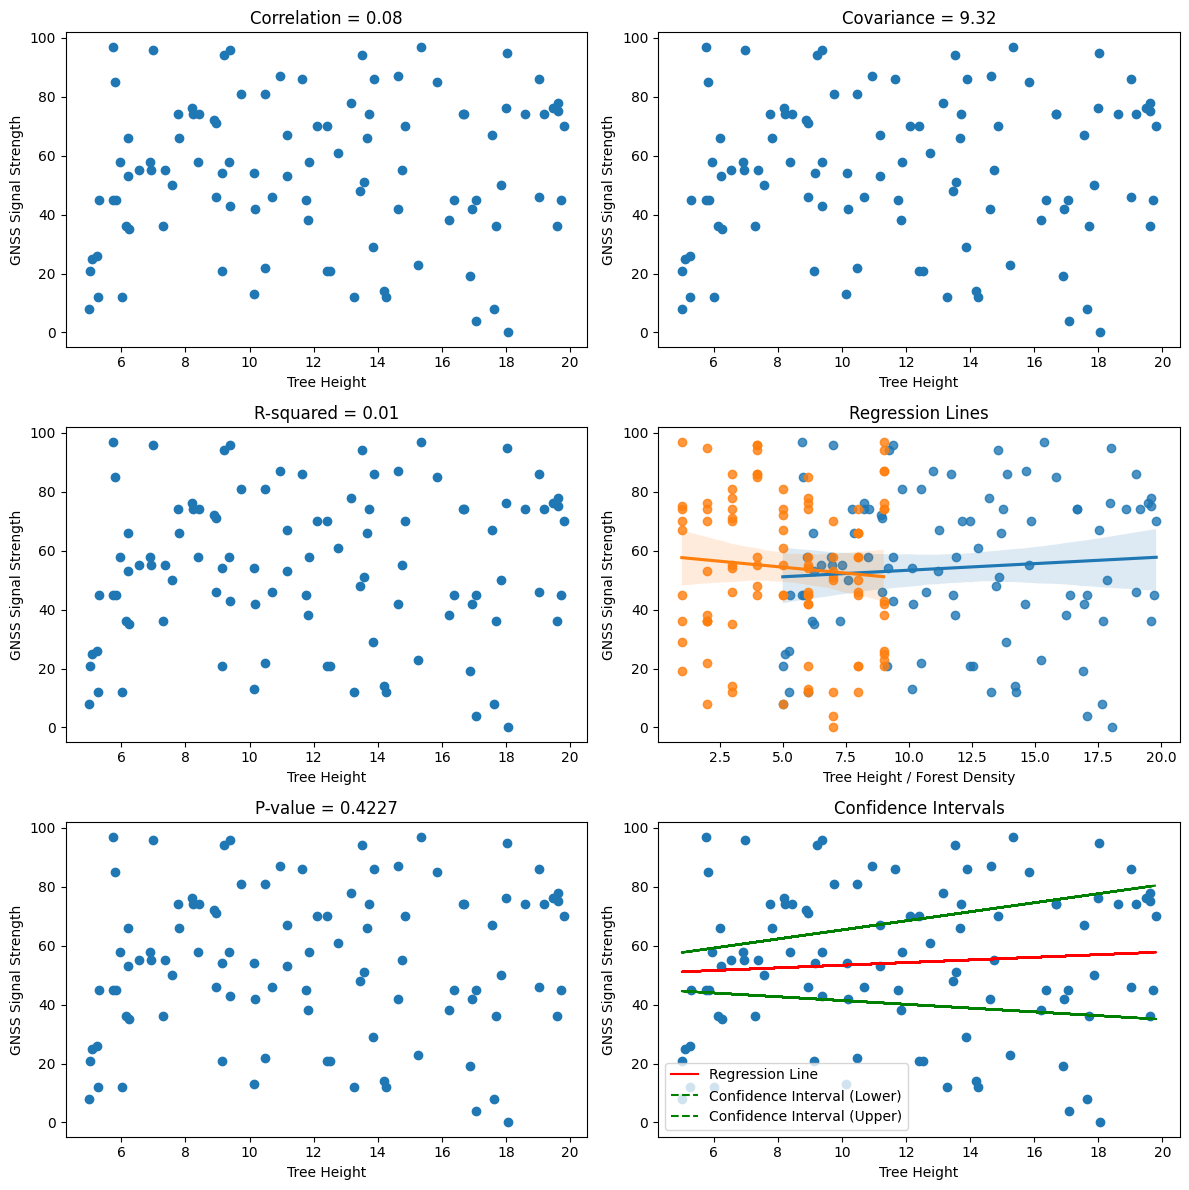

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# Generate demo GNSS data
num_points = 100
gnss_data = {
    'time': np.arange(num_points),
    'signal_strength': np.random.randint(0, 100, num_points)
}

gnss_df = pd.DataFrame(gnss_data)

# Generate demo tree data
tree_data = {
    'time': np.random.choice(np.arange(num_points), size=num_points, replace=True),
    'tree_height': np.random.uniform(5, 20, num_points),
    'num_trees_per_sqm': np.random.randint(1, 10, num_points)
}

tree_df = pd.DataFrame(tree_data)

# Merge with tree data based on a common parameter (e.g., time)
merged_data = pd.merge(gnss_df, tree_df, on='time', how='inner')

# Perform correlation analysis
correlation_height = np.corrcoef(merged_data['signal_strength'], merged_data['tree_height'])[0, 1]
correlation_density = np.corrcoef(merged_data['signal_strength'], merged_data['num_trees_per_sqm'])[0, 1]

# Covariance
covariance_height = np.cov(merged_data['signal_strength'], merged_data['tree_height'])[0, 1]

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['tree_height'], merged_data['signal_strength'])
r_squared = r_value**2

# Confidence Intervals
conf_int_slope = (slope - 1.96 * std_err, slope + 1.96 * std_err)
conf_int_intercept = (intercept - 1.96 * std_err, intercept + 1.96 * std_err)

# Plot each statistic in different plots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Correlation
axs[0, 0].scatter(merged_data['tree_height'], merged_data['signal_strength'])
axs[0, 0].set_title(f"Correlation = {correlation_height:.2f}")
axs[0, 0].set_xlabel('Tree Height')
axs[0, 0].set_ylabel('GNSS Signal Strength')

# Plot 2: Covariance
axs[0, 1].scatter(merged_data['tree_height'], merged_data['signal_strength'])
axs[0, 1].set_title(f"Covariance = {covariance_height:.2f}")
axs[0, 1].set_xlabel('Tree Height')
axs[0, 1].set_ylabel('GNSS Signal Strength')

# Plot 3: R-squared
axs[1, 0].scatter(merged_data['tree_height'], merged_data['signal_strength'])
axs[1, 0].set_title(f"R-squared = {r_squared:.2f}")
axs[1, 0].set_xlabel('Tree Height')
axs[1, 0].set_ylabel('GNSS Signal Strength')

# Plot 4: Regression Lines
sns.regplot(x='tree_height', y='signal_strength', data=merged_data, ax=axs[1, 1])
sns.regplot(x='num_trees_per_sqm', y='signal_strength', data=merged_data, ax=axs[1, 1])
axs[1, 1].set_title('Regression Lines')
axs[1, 1].set_xlabel('Tree Height / Forest Density')
axs[1, 1].set_ylabel('GNSS Signal Strength')

# Plot 5: P-value
axs[2, 0].scatter(merged_data['tree_height'], merged_data['signal_strength'])
axs[2, 0].set_title(f"P-value = {p_value:.4f}")
axs[2, 0].set_xlabel('Tree Height')
axs[2, 0].set_ylabel('GNSS Signal Strength')

# Plot 6: Confidence Intervals
axs[2, 1].scatter(merged_data['tree_height'], merged_data['signal_strength'])
axs[2, 1].plot(merged_data['tree_height'], slope * merged_data['tree_height'] + intercept, color='red', label='Regression Line')
axs[2, 1].plot(merged_data['tree_height'], conf_int_slope[0] * merged_data['tree_height'] + conf_int_intercept[0], linestyle='--', color='green', label='Confidence Interval (Lower)')
axs[2, 1].plot(merged_data['tree_height'], conf_int_slope[1] * merged_data['tree_height'] + conf_int_intercept[1], linestyle='--', color='green', label='Confidence Interval (Upper)')
axs[2, 1].set_title('Confidence Intervals')
axs[2, 1].set_xlabel('Tree Height')
axs[2, 1].set_ylabel('GNSS Signal Strength')
axs[2, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
pip install georinex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.1/120.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.0 MB/s eta 0:00:00


In [ ]:
import georinex as gr

In [ ]:
pip install georinex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.1/120.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.9 MB/s eta 0:00:00


In [ ]:
obs = gr.load('/content/reachqbase_raw_20231214093229.23O')

In [ ]:
print(obs)

<xarray.Dataset>
Dimensions:  (time: 1819, sv: 31)
Coordinates:
  * time     (time) datetime64[ns] 2023-12-14T09:32:48 ... 2023-12-14T10:03:06
  * sv       (sv) <U3 'C02' 'C03' 'C05' 'C06' 'C07' ... 'G27' 'G30' 'J02' 'J03'
Data variables:
    C1C      (time, sv) float64 nan nan nan ... 2.234e+07 4.128e+07 3.967e+07
    L1C      (time, sv) float64 nan nan nan ... 1.174e+08 2.169e+08 2.085e+08
    D1C      (time, sv) float64 nan nan nan nan ... 2.464e+03 333.1 -226.4
    S1C      (time, sv) float64 nan nan nan nan nan ... 16.0 31.0 43.0 37.0 34.0
    C1I      (time, sv) float64 3.67e+07 3.747e+07 3.737e+07 ... nan nan nan
    L1I      (time, sv) float64 nan 1.951e+08 1.946e+08 ... nan nan nan
    D1I      (time, sv) float64 -212.3 -181.1 -228.0 -320.0 ... nan nan nan nan
    S1I      (time, sv) float64 29.0 36.0 33.0 32.0 40.0 ... nan nan nan nan nan
Attributes:
    version:          3.03
    interval:         1.0
    rinextype:        obs
    fast_processing:  0
    time_system:      GP

In [ ]:
from matplotlib.pyplot import figure, show
ax = figure().obs()
ax.plot(obs.time, obs['L1c'])
show()

AttributeError: 'Figure' object has no attribute 'obs'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Step 1: Install necessary libraries
!pip install rasterio geopandas

# Step 2: Import libraries
import rasterio
import geopandas as gpd
from shapely.geometry import shape
import json

# Step 3: Define the function to convert TIFF to GeoJSON
def tiff_to_geojson(tiff_path, geojson_path):
    # Read the TIFF file
    with rasterio.open(tiff_path) as src:
        band = src.read(1)
        mask = band != src.nodata
        results = (
            {'properties': {'raster_val': v}, 'geometry': s}
            for i, (s, v) in enumerate(
                rasterio.features.shapes(band, mask=mask, transform=src.transform))
        )

        # Convert to GeoDataFrame
        geoms = list(results)
        gdf = gpd.GeoDataFrame.from_features(geoms)

        # Save to GeoJSON
        gdf.to_file(geojson_path, driver='GeoJSON')

# Step 4: Define file paths
tiff_path = '/path/to/npl_weak_buildings_households.tif'
geojson_path = '/path/to/output.geojson'

# Step 5: Convert TIFF to GeoJSON
tiff_to_geojson(tiff_path, geojson_path)

print(f"GeoJSON file saved to {geojson_path}")
